# Homework 13

## ASTR 5900, Fall 2017, University of Oklahoma

### Time Series

# Problem 1

In this problem we will investigate the sea levels of two different locations: Prudhoe Bay, Alaska  and Honolulu Hawaii.  The points in both data set were recorded every 6 minutes for a year.

### Part A

Load the data located at `time-series/honolulu.csv` and `time-series/prudhoe-bay.csv` respectively.  Plot each time series as a function of **elapsed time in days**.

Describe the time series qualitatively, exploring similarities and differences.

#### Your Answer Here:



In [29]:
import numpy as np

#Note I adjusted the csv files to replace the commas separating the time and value columns with a space as this was
#very easy to do in a jupyter notebook

honolulu=np.genfromtxt('honolulu.csv',dtype=None,names=('date','time','value'))
print honolulu['date']

['8/1/16' '8/1/16' '8/1/16' ..., '7/31/17' '7/31/17' '7/31/17']


In [30]:
print honolulu['time']

['0:00' '0:06' '0:12' ..., '23:42' '23:48' '23:54']


In [31]:
#Let's make the time matrix into fraction of a day


temp=np.zeros((87600,2))
a=-1
for i in honolulu['time']:
    a+=1
    temp[a,0],temp[a,1]=i.split(':')
print temp

[[  0.   0.]
 [  0.   6.]
 [  0.  12.]
 ..., 
 [ 23.  42.]
 [ 23.  48.]
 [ 23.  54.]]


In [32]:
time=np.zeros(87600)
for i in range(len(temp[:,0])):
    time[i]=(temp[i,0]*60. +temp[i,1])/1440.
print time

[ 0.          0.00416667  0.00833333 ...,  0.9875      0.99166667
  0.99583333]


In [33]:
day=np.zeros(87600)
for i in range(365):
    day[i*240:(i+1)*240]=i+time[i*240:(i+1)*240]
    
print day

    
    

[  0.00000000e+00   4.16666667e-03   8.33333333e-03 ...,   3.64987500e+02
   3.64991667e+02   3.64995833e+02]


In [34]:
print day.shape

(87600,)


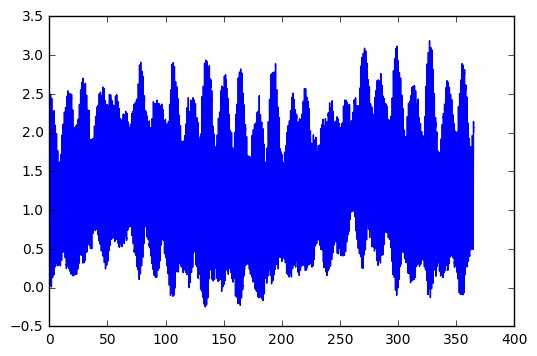

In [35]:
from matplotlib import pyplot as plt
y=honolulu['value']
plt.plot(day,y)
plt.show()

In [36]:
prudhoe=np.genfromtxt('prudhoe-bay.csv',skip_header=1,dtype=None,names=('date','time','value'))

In [37]:
temp2=np.zeros((87600,2))
a=-1
for i in prudhoe['time']:
    a+=1
    temp2[a,0],temp2[a,1]=i.split(':')
    
time2=np.zeros(87600)
for i in range(len(temp2[:,0])):
    time2[i]=(temp2[i,0]*60. +temp2[i,1])/1440.
    
day2=np.zeros(87600)
for i in range(365):
    day2[i*240:(i+1)*240]=i+time2[i*240:(i+1)*240]
    




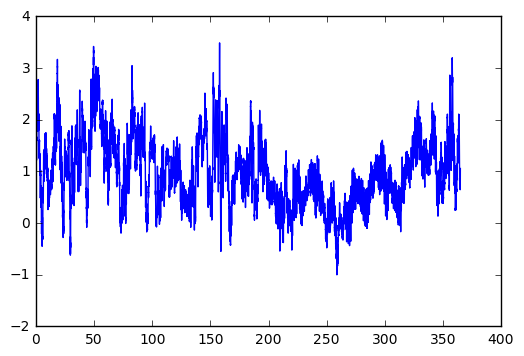

In [38]:
y2=prudhoe['value']
plt.plot(day2,y2)
plt.show()

### Part B

Compute the power spectrum of each light curve and plot.  Plot the unbinned light curve, and plot separately, the binned light curve (as discussed in class on Wednesday, November 15).

Discuss your answer. Include a discussion of any periodic components and any stocastic components.  What are the similarities and differences?  Take include in your discussion a qualitative description of the amount of power in each component.  What does this tell you about the behavior of tides in these two locations?  




### Your answer here:



In [39]:
from astroML.fourier import PSD_continuous

In [40]:
f, PSD = PSD_continuous(day,y)
f2,PSD2 = PSD_continuous(day2,y2)

In [70]:
print len(f)
print len(PSD)

43801
43801


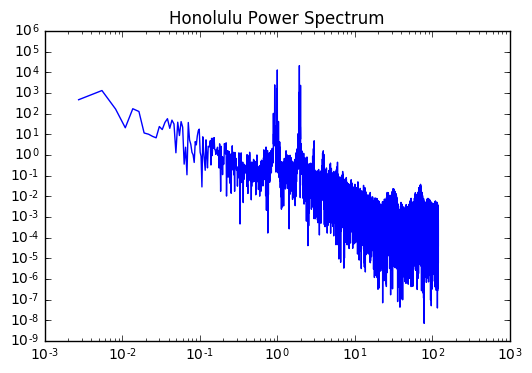

In [41]:
plt.loglog(f,PSD)
plt.title("Honolulu Power Spectrum")
plt.show()


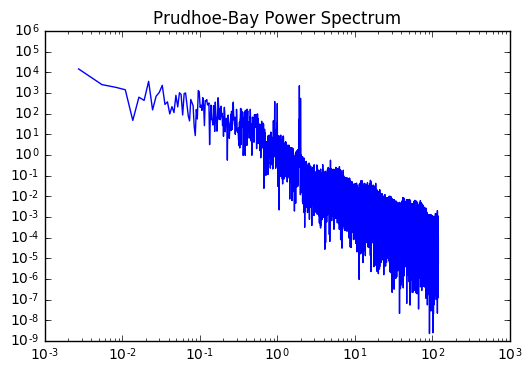

In [42]:
plt.loglog(f2,PSD2)
plt.title('Prudhoe-Bay Power Spectrum')
plt.show()

### Part C

Add Gaussian errors to the data and recalculate the power spectra.  Choose a range of different sizes of Gaussian errors. 

Discuss qualitatively and quantitatively the differences as you increase the size of the error.  Does this make sense?



### Your Answer Here:

### Part D

Calculate the power spectrum with undersample data.  Slice the data so that you use every 2nd point, every 10th point, and every 100th point.

Discuss qualitatively and quantitatively the similarities and differences as you degrade the data by decreasing the rate of samplling.  

### Your Answer Here

Using every 2nd point

In [50]:
print len(day)
print len(y)

87600
87600


In [51]:
day_by_2=[]
y_by_2=[]

for i in range(len(day)):
  
    if i % 2 == 0:
        day_by_2=np.append(day_by_2,day[i])
        y_by_2=np.append(y_by_2,y[i])




In [52]:
print len(day_by_2)
print len(y_by_2)

43800
43800


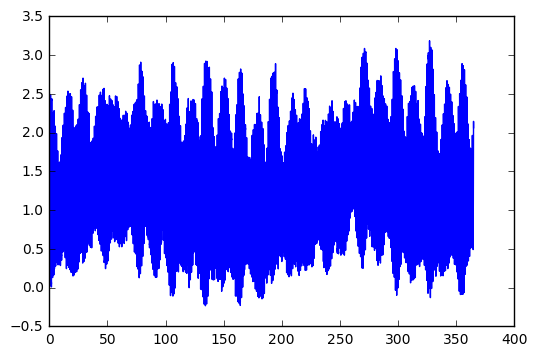

In [53]:
plt.plot(day_by_2,y_by_2)
plt.show()

In [54]:

day2_by_2 = []
y2_by_2 = []

for i in range(len(day2)):
    if i % 2 == 0:
        day2_by_2=np.append(day2_by_2,day2[i])
        y2_by_2=np.append(y2_by_2,y2[i])


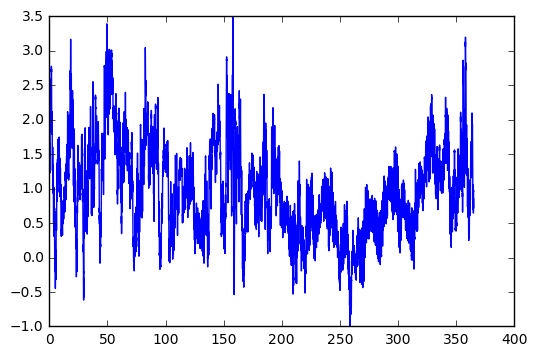

In [55]:
plt.plot(day2_by_2,y2_by_2)
plt.show()

In [56]:
f_by_2, PSD_by_2 = PSD_continuous(day_by_2,y_by_2)
f2_by_2,PSD2_by_2 = PSD_continuous(day2_by_2,y2_by_2)

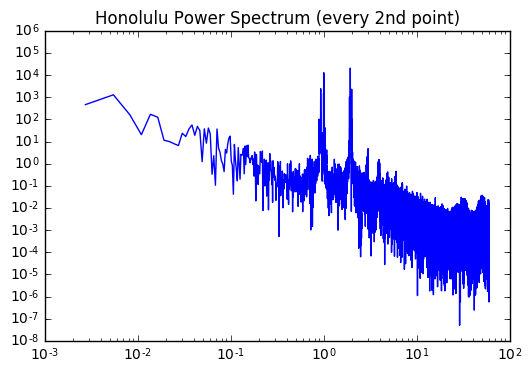

In [57]:
plt.loglog(f_by_2,PSD_by_2)
plt.title("Honolulu Power Spectrum (every 2nd point)")
plt.show()

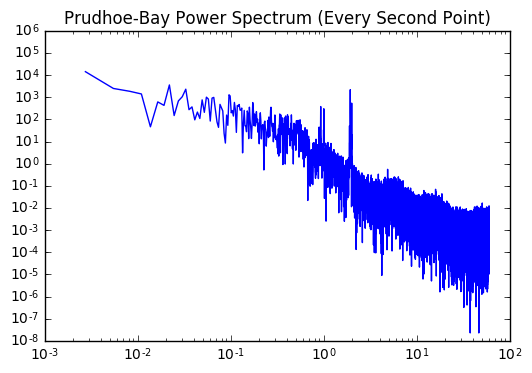

In [58]:
plt.loglog(f2_by_2,PSD2_by_2)
plt.title('Prudhoe-Bay Power Spectrum (Every Second Point)')
plt.show()

Every 10th

In [59]:
day_by_10=[]
y_by_10=[]

for i in range(len(day)):
  
    if i % 10 == 0:
        day_by_10=np.append(day_by_10,day[i])
        y_by_10=np.append(y_by_10,y[i])

day2_by_10 = []
y2_by_10 = []

for i in range(len(day2)):
    if i % 10 == 0:
        day2_by_10=np.append(day2_by_10,day2[i])
        y2_by_10=np.append(y2_by_10,y2[i])
        
f_by_10, PSD_by_10 = PSD_continuous(day_by_10,y_by_10)
f2_by_10,PSD2_by_10 = PSD_continuous(day2_by_10,y2_by_10)       


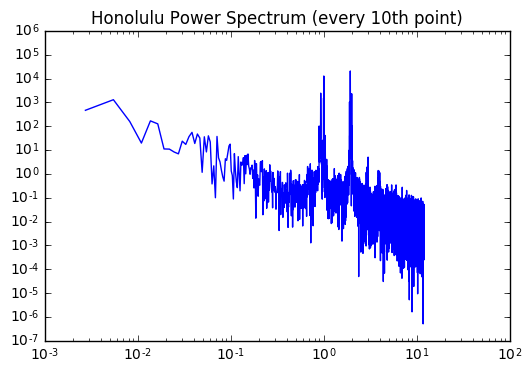

In [60]:
plt.loglog(f_by_10,PSD_by_10)
plt.title("Honolulu Power Spectrum (every 10th point)")
plt.show()

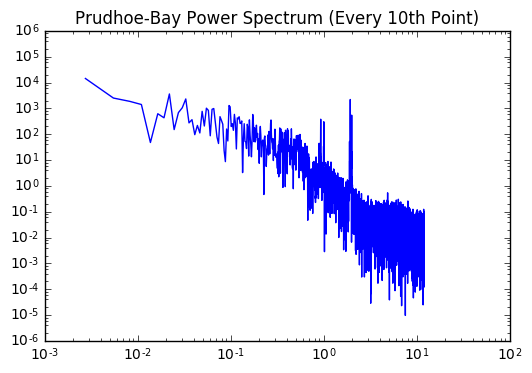

In [61]:
plt.loglog(f2_by_10,PSD2_by_10)
plt.title('Prudhoe-Bay Power Spectrum (Every 10th Point)')
plt.show()

Every 100th

In [62]:
day_by_100=[]
y_by_100=[]

for i in range(len(day)):
  
    if i % 100 == 0:
        day_by_100=np.append(day_by_100,day[i])
        y_by_100=np.append(y_by_100,y[i])

day2_by_100 = []
y2_by_100 = []

for i in range(len(day2)):
    if i % 100 == 0:
        day2_by_100=np.append(day2_by_100,day2[i])
        y2_by_100=np.append(y2_by_100,y2[i])
        
f_by_100, PSD_by_100 = PSD_continuous(day_by_100,y_by_100)
f2_by_100,PSD2_by_100 = PSD_continuous(day2_by_100,y2_by_100)       


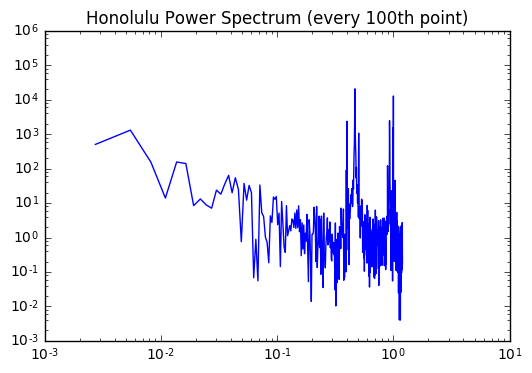

In [63]:
plt.loglog(f_by_100,PSD_by_100)
plt.title("Honolulu Power Spectrum (every 100th point)")
plt.show()

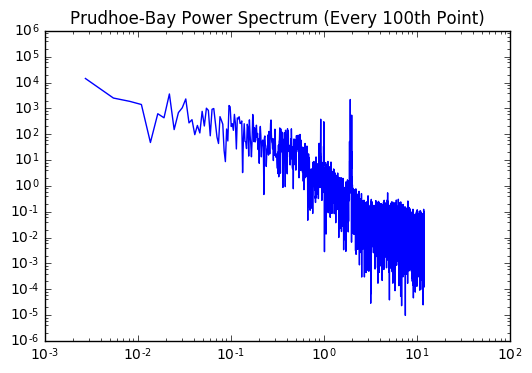

In [64]:
plt.loglog(f2_by_10,PSD2_by_10)
plt.title('Prudhoe-Bay Power Spectrum (Every 100th Point)')
plt.show()

### Part E

Now apply a window function.  Imagine that, for whatever reason, the detector did not operate during the last four hours of each day.   Compute the power spectra as before and plot.

Discuss the results below.  Based on your understanding of power spectra, do the results make sense?




### Your Answer Here:

Data is taken in 6 minute intervals, meaning the last four hours make up the last 40 data points for each day. Each day has 240 data points so we want to keep

[0:200]
[240:440]
[480:680]
...

In [65]:
day_window=[]
y_window=[]
day2_window=[]
y2_window=[]
for i in range(365):
    day_window=np.append(day_window,day[i*240:((i+1)*240)-40])
    y_window=np.append(y_window,y[i*240:((i+1)*240)-40])
    day2_window=np.append(day2_window,day2[i*240:((i+1)*240)-40])
    y2_window=np.append(y2_window,y2[i*240:((i+1)*240)-40])

    

In [66]:
print len(day_window)

73000


In [67]:
f_window, PSD_window = PSD_continuous(day_window,y_window)
f2_window,PSD2_window = PSD_continuous(day2_window,y2_window)   

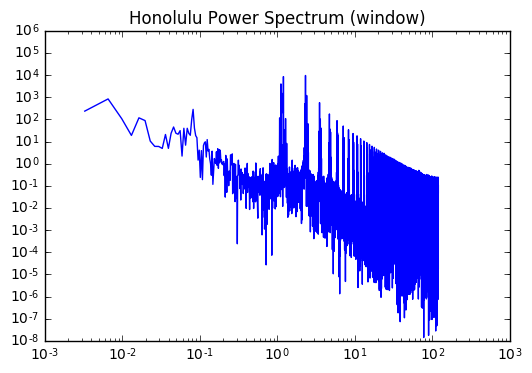

In [68]:
plt.loglog(f_window,PSD_window)
plt.title("Honolulu Power Spectrum (window)")
plt.show()

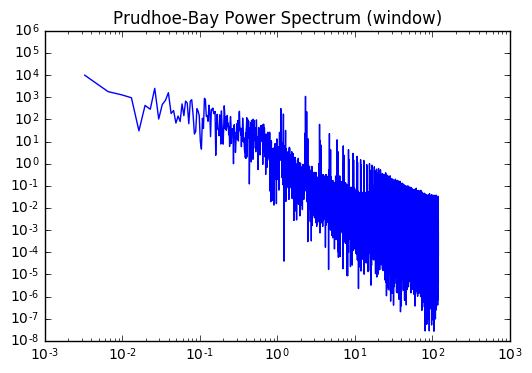

In [69]:
plt.loglog(f2_window,PSD2_window)
plt.title('Prudhoe-Bay Power Spectrum (window)')
plt.show()

### Part F

A better way to obtain statistically representative power spectra, when you have lots of data, is to split the time series into segments, compute the power spectrum for each segment, and average the power spectra.  The uncertainties are then the standard deviation at each frequency.

Split the data into 12 equal parts.  Determine the average power spectrum with errors.

Discuss your results below.

### Your Answer Here

In [74]:
f_split=np.zeros((12,3651))
PSD_split=np.zeros((12,3651))
f2_split=np.zeros((12,3651))
PSD2_split=np.zeros((12,3651))

for i in range(12):
    f_split[i,:],PSD_split[i,:]=PSD_continuous(day[(87600./12.)*i:(87600./12.)*(i+1)],y[(87600./12.)*i:(87600./12.)*(i+1)])
    f2_split[i,:],PSD2_split[i,:]=PSD_continuous(day2[(87600./12.)*i:(87600./12.)*(i+1)],y2[(87600./12.)*i:(87600./12.)*(i+1)])

/home/collin/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/collin/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [77]:
average_PSD=(np.sum(PSD_split,axis=0))/12.


In [82]:
print len(average_PSD)
print len(f_split[0])

3651
3651


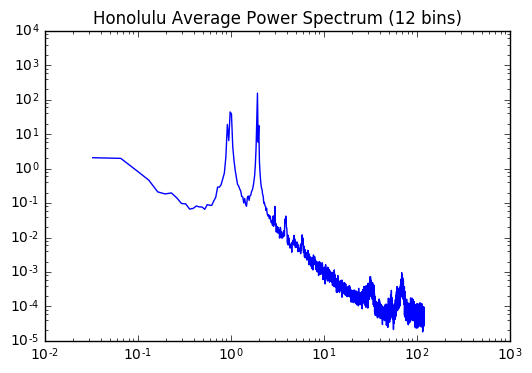

In [87]:
plt.loglog(f_split[0],average_PSD)
plt.title("Honolulu Average Power Spectrum (12 bins)")
plt.show()

In [86]:
average_PSD2=(np.sum(PSD2_split,axis=0))/12.

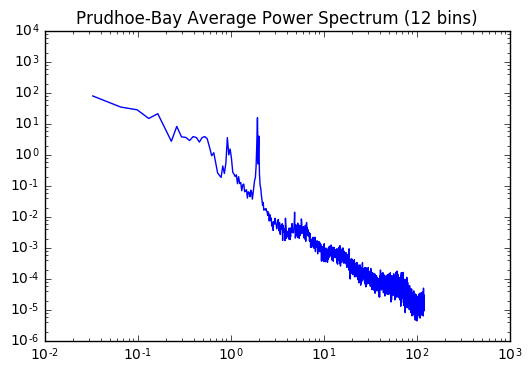

In [88]:
plt.loglog(f2_split[0],average_PSD2)
plt.title('Prudhoe-Bay Average Power Spectrum (12 bins)')
plt.show()

# Problem Z

Comment on the time required for this assignment.

About 6 hours to get this far